<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [5]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])


In [6]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot

import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [8]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())


In [9]:
boston_df=pd.read_csv(boston_url)


#### Add your code below following the instructions given in the course to complete the peer graded assignment


TASK 1A

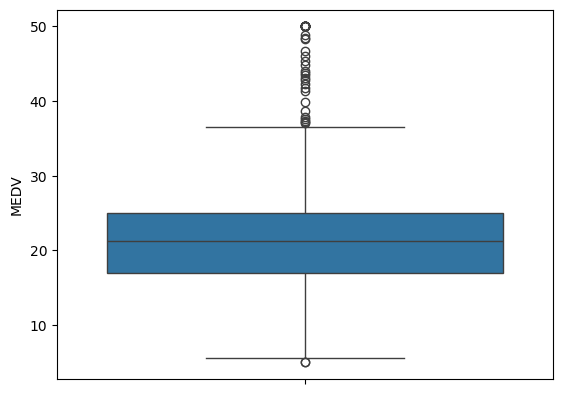

In [7]:
BXP_MEDV = sns.boxplot(y = "MEDV", data = boston_df)

EXPLANATION: the boxplot for the median value of owner-occupied homes shows the central tendency and spread of the data, with a median value around 20-25. The presence of several outliers above the upper whisker indicates that while most home values are within a certain range, there are a number of homes with much higher values.

TASK 1B

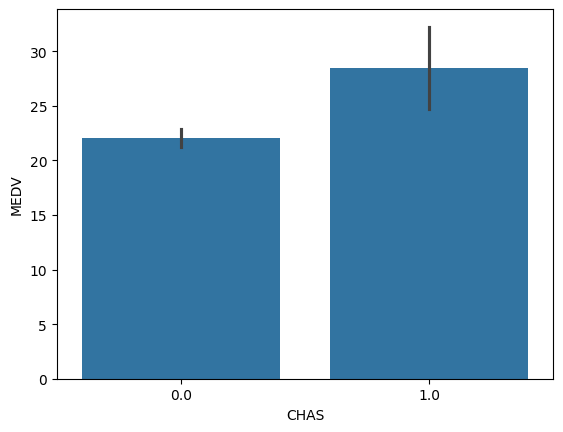

In [8]:
BAP_CHAS = sns.barplot(x = "CHAS", y = "MEDV", data = boston_df)

EXPLANATION: The bar plot provided shows the relationship between the Charles River variable (CHAS) and the median value of owner-occupied homes (MEDV). Homes that do not bound the Charles River (CHAS = 0) have a lower average median value compared to those that do bound the Charles River (CHAS = 1). The average MEDV for homes bounding the Charles River is noticeably higher, suggesting that proximity to the river is associated with higher home values.


TASK 1C

In [11]:
bins_edges = [0,35,71, float("inf")]
_AGE = pd.cut(boston_df["AGE"], bins = bins_edges, labels = ["Low", "Medium", "High"])
boston_df["_AGE"] = _AGE

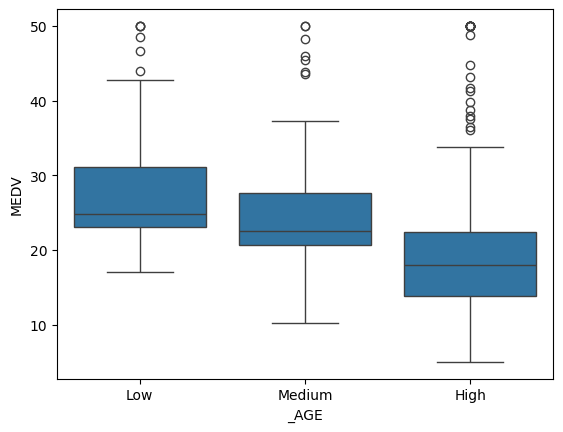

In [14]:
MEDV_AGE = sns.boxplot(x = "_AGE", y = "MEDV", data = boston_df)

EXPLANATION: Low Age Group: Homes that are 35 years and younger tend to have a higher median value compared to older homes. The median value is around 25-30. Medium Age Group: Homes aged between 35 and 70 years have a slightly lower median value than the youngest group, with a median around 22-25. High Age Group: Homes that are 70 years and older have the lowest median value among the three groups, with a median around 20-22. The median value of homes decreases as the age of the property increases. This suggests that newer homes tend to have higher median values compared to older homes.

In [ ]:
TASK 1D

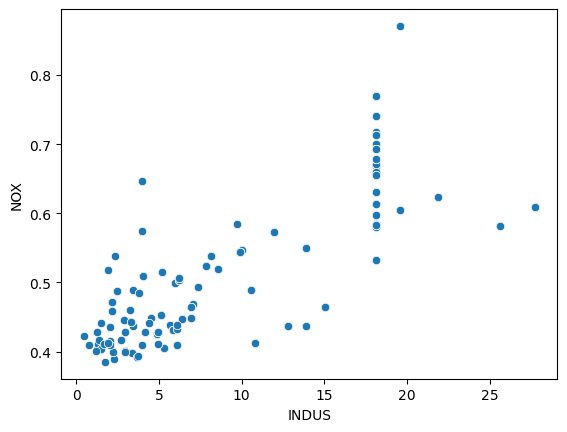

In [15]:
DIST = sns.scatterplot( x = "INDUS", y = "NOX", data = boston_df)

The provided scatter plot shows a weak positive relationship between nitric oxide (NOX) concentrations and the proportion of non-retail business acres per town (INDUS) in the boston_df data.

EXPLANATION: Even though we see a positive correlation here, it doesn't necessarily mean that a higher proportion of non-retail business acres causes higher nitric oxide concentrations. There could be other factors affecting both variables.

TASK 1E

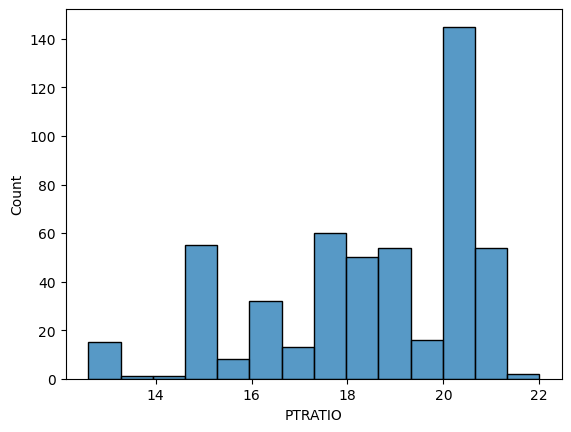

In [16]:
HIST_PTRATIO = sns.histplot(x = "PTRATIO", data = boston_df)

EXPLANATION: X-axis: This represents the pupil-teacher ratio. It will likely range from a low value (few students per teacher) to a higher value (more students per teacher). The axis will be divided into bins (intervals).Y-axis: This represents the number of houses (frequency) that fall within each bin of the pupil-teacher ratio range. The height of each bar corresponds to the number of houses in that particular bin.

TASK 2A

H0 : There's no significant difference in median value of houses bounded by the Charles river or not

H1 : There's a significant difference in median value of houses bounded by the Charles river or not

In [10]:
t_test= scipy.stats.ttest_ind(boston_df[boston_df["CHAS"] == 1]["MEDV"], boston_df[boston_df["CHAS"] == 0]["MEDV"], equal_var=True)
t_test

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

In [12]:
pvalue=7.390623170519905e-05
alpha = 0.05
significant = pvalue < alpha
significant

True

EXPLANATION: The p-value (0.00007391) is much smaller than the significance level (alpha = 0.05). If the p-value is less than the alpha level, we reject the null hypothesis (H0). Since the p-value (0.00007391) is less than 0.05, we reject the null hypothesis.

TASK 2B

Null Hypothesis (H0): There is no significant difference in the median values of houses (MEDV) among the different age groups (Low, Medium, High).
Alternative Hypothesis (H1): There is a significant difference in the median values of houses (MEDV) among the different age groups (Low, Medium, High).

In [19]:
scipy.stats.levene(boston_df[boston_df["_AGE"] == "Low"]["MEDV"], boston_df[boston_df["_AGE"] == "Medium"]["MEDV"],boston_df[boston_df["_AGE"] == "High"]["MEDV"])

LeveneResult(statistic=2.839641888571076, pvalue=0.059383991171756585)

In [20]:
Low_Age = boston_df[boston_df["_AGE"] == "Low"]["MEDV"]
Medium_Age = boston_df[boston_df["_AGE"] == "Medium"]["MEDV"]
High_Age = boston_df[boston_df["_AGE"] == "High"]["MEDV"]
f_statistic, p_value = scipy.stats.f_oneway(Low_Age, Medium_Age, High_Age)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 37.34433173812786, P-Value: 7.556944091555335e-16


In [21]:
pvalue_ANOVA = 7.556944091555335e-16
ANOVA = pvalue_ANOVA < 0.05
ANOVA

True

EXPLANATIOn: Since the p-value (7.556944091555335e-16) is far less than 0.05, we reject the null hypothesis. we conclude that there is a significant difference in the median values of houses (MEDV) among the different age groups (Low, Medium, High). The ANOVA test indicates that the age of properties significantly affects the median value of owner-occupied homes.

TASK 2C

Null Hypothesis (H0): There is no relationship between nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).
Alternative Hypothesis (H1): There is a relationship between nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).

In [22]:
scipy.stats.pearsonr(boston_df["INDUS"], boston_df["NOX"])


PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

EXPLANATION: There is strong statistical evidence to reject the null hypothesis. Therefore, we conclude that there is a significant relationship between nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS). The positive Pearson correlation coefficient (r) of 0.7636514469209192 indicates a strong positive linear relationship between these two variables. This means that as the proportion of non-retail business acres per town increases, the nitric oxide concentrations also tend to increase.

we reject the null hypothesis.

TASK 2D

In [ ]:
Null Hypothesis (H0): The coefficient for DIS is equal to 0 (no impact).
Alternative Hypothesis (H1): The coefficient for DIS is not equal to 0 (there is an impact)

In [13]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 04 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        10:39:31   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

EXPLANATION: Since the p-value for the DIS coefficient is less than the alpha level of 0.05, we reject the null hypothesis. Therefore, we conclude that there is a statistically significant impact of the weighted distance to the five Boston employment centres (DIS) on the median value of owner-occupied homes (MEDV). An increase in the weighted distance to the employment centres is associated with an increase in the median value of homes.